## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 確認硬體資源 (如果你是在 Linux, 若是在 Windows, 請參考 https://blog.csdn.net/idwtwt/article/details/78017565)
# !nvidia-smi

In [2]:
import os
import keras
import tensorflow

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = 2 * (((x - x.min()) / (x.max() - x.min())) - 0.5)
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y   

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = tensorflow.keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = tensorflow.keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = tensorflow.keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = tensorflow.keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = tensorflow.keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330   

In [8]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [9]:
optimizer = tensorflow.keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [10]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 139us/sample - loss: 1.7058 - accuracy: 0.3920 - val_loss: 1.5696 - val_accuracy: 0.4468
Epoch 2/100
50000/50000 [==============================] - 6s 125us/sample - loss: 1.4831 - accuracy: 0.4747 - val_loss: 1.4605 - val_accuracy: 0.4931
Epoch 3/100
50000/50000 [==============================] - 6s 123us/sample - loss: 1.3604 - accuracy: 0.5213 - val_loss: 1.4441 - val_accuracy: 0.4906
Epoch 4/100
50000/50000 [==============================] - 6s 120us/sample - loss: 1.2734 - accuracy: 0.5497 - val_loss: 1.3953 - val_accuracy: 0.5112
Epoch 5/100
50000/50000 [==============================] - 6s 121us/sample - loss: 1.1857 - accuracy: 0.5817 - val_loss: 1.3894 - val_accuracy: 0.5120
Epoch 6/100
50000/50000 [==============================] - 6s 119us/sample - loss: 1.1151 - accuracy: 0.6077 - val_loss: 1.3782 - val_accuracy: 0.5244
Epoch 7/100
50000/50000 [===================

50000/50000 [==============================] - 6s 130us/sample - loss: 0.0896 - accuracy: 0.9703 - val_loss: 4.1761 - val_accuracy: 0.5299
Epoch 55/100
50000/50000 [==============================] - 7s 136us/sample - loss: 0.1269 - accuracy: 0.9573 - val_loss: 3.9806 - val_accuracy: 0.5237
Epoch 56/100
50000/50000 [==============================] - 7s 143us/sample - loss: 0.1135 - accuracy: 0.9615 - val_loss: 4.0032 - val_accuracy: 0.5297
Epoch 57/100
50000/50000 [==============================] - 6s 126us/sample - loss: 0.0944 - accuracy: 0.9687 - val_loss: 4.0548 - val_accuracy: 0.5314
Epoch 58/100
50000/50000 [==============================] - 6s 125us/sample - loss: 0.0812 - accuracy: 0.9728 - val_loss: 4.1795 - val_accuracy: 0.5284
Epoch 59/100
50000/50000 [==============================] - 6s 130us/sample - loss: 0.1170 - accuracy: 0.9624 - val_loss: 4.0558 - val_accuracy: 0.5256
Epoch 60/100
50000/50000 [==============================] - 6s 125us/sample - loss: 0.1080 - accuracy

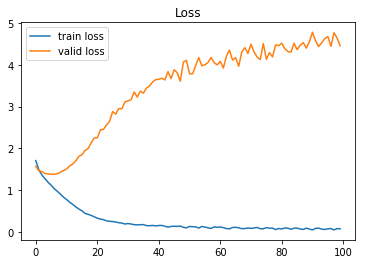

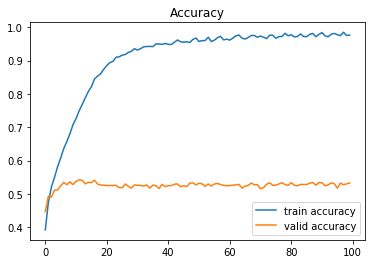

In [12]:
import matplotlib.pyplot as plt

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()